In [5]:
from torch.utils.data import DataLoader
from covidecg.data.ecg_dataset import EcgDataset
import matplotlib.pyplot as plt
import torch
import sklearn
from sklearn.model_selection import train_test_split

torch.manual_seed(0)


dataset = EcgDataset(
    runs_info_file='../data/interim/ecg_runs.csv', 
    signals_dir='../data/interim/ecg_runs', 
    flatten_signal=True)

dataset[

TypeError: join() argument must be str, bytes, or os.PathLike object, not 'Series'

In [ ]:
from torch.utils.data import DataLoader
from covidecg.data.ecg_dataset import EcgDataset
import matplotlib.pyplot as plt
import torch
import sklearn
from sklearn.model_selection import train_test_split

torch.manual_seed(0)


dataset = EcgDataset(
    runs_info_file='../data/interim/ecg_runs.csv', 
    signals_dir='../data/interim/ecg_runs', 
    flatten_signal=True)

# create train and test dataset using hold-out approach
train_indices, test_indices = train_test_split(list(range(len(dataset))), test_size=0.2, stratify=dataset.labels)

train_dataset = torch.utils.data.Subset(dataset, train_indices)
test_dataset = torch.utils.data.Subset(dataset, test_indices)

train_dataloader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=True)

X_train, y_train = next(iter(train_dataloader))
X_test, y_test = next(iter(test_dataloader))

### SVC linear

In [ ]:
model = sklearn.svm.SVC(kernel="linear", class_weight='balanced')

# train model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion matrix
[[0.27419355 0.72580645]
 [0.21084337 0.78915663]]
balanced accuracy: 0.5316750874465604
f1 score: 0.7660818713450294
roc_auc: 0.5316750874465604
precision: 0.7443181818181818
recall: 0.7891566265060241


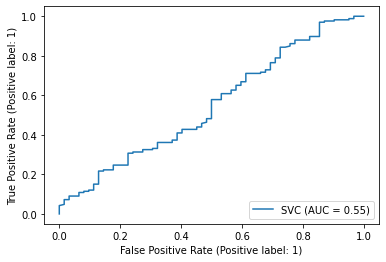

In [ ]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay

# evaluate model
print("confusion matrix")
print(confusion_matrix(y_test, y_pred, normalize='true'))

print("balanced accuracy:", balanced_accuracy_score(y_test,y_pred))
print("f1 score:", f1_score(y_test,y_pred))
print("roc_auc:", roc_auc_score(y_test, y_pred))
print("precision:", precision_score(y_test,y_pred))
print("recall:", recall_score(y_test,y_pred))

roc_curve = RocCurveDisplay.from_estimator(model, X_test, y_test)

### SVC rbf

In [ ]:
model = sklearn.svm.SVC(kernel="rbf", class_weight='balanced')

# train model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion matrix
[[0.43548387 0.56451613]
 [0.28915663 0.71084337]]
balanced accuracy: 0.5731636222308589
f1 score: 0.7398119122257053
roc_auc: 0.5731636222308588
precision: 0.7712418300653595
recall: 0.7108433734939759


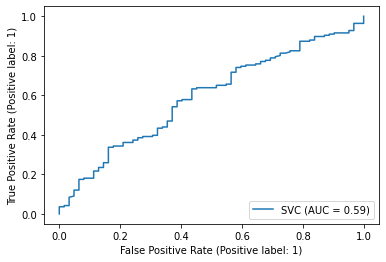

In [ ]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay

# evaluate model
print("confusion matrix")
print(confusion_matrix(y_test, y_pred, normalize='true'))

print("balanced accuracy:", balanced_accuracy_score(y_test,y_pred))
print("f1 score:", f1_score(y_test,y_pred))
print("roc_auc:", roc_auc_score(y_test, y_pred))
print("precision:", precision_score(y_test,y_pred))
print("recall:", recall_score(y_test,y_pred))

roc_curve = RocCurveDisplay.from_estimator(model, X_test, y_test)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# train model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion matrix
[[0.09677419 0.90322581]
 [0.07831325 0.92168675]]
balanced accuracy: 0.5092304702681695
f1 score: 0.8160000000000001
roc_auc: 0.5092304702681695
precision: 0.7320574162679426
recall: 0.9216867469879518


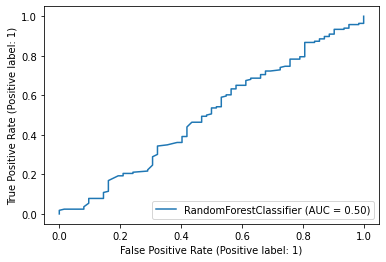

In [ ]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay

# evaluate model)
print("confusion matrix")
print(confusion_matrix(y_test, y_pred, normalize='true'))

print("balanced accuracy:", balanced_accuracy_score(y_test,y_pred))
print("f1 score:", f1_score(y_test,y_pred))
print("roc_auc:", roc_auc_score(y_test, y_pred))
print("precision:", precision_score(y_test,y_pred))
print("recall:", recall_score(y_test,y_pred))

roc_curve = RocCurveDisplay.from_estimator(model, X_test, y_test)